# NAME-SANKET YALMAR

# THE SPARKS FOUNDATION GRIP INTERNSHIP

# TASK 1:Prediction using Supervised ML


## Objective:Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking Null Values Present or Not

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#Getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting the distribution of scores

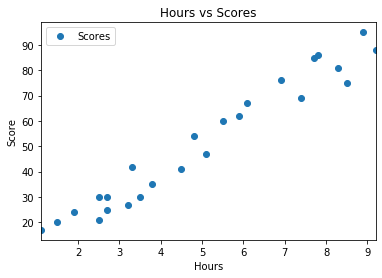

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

# Preparing and Splitting the data

In [6]:
#Preparing the data
X = data.drop(columns=['Scores'])
Y = data['Scores']

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17,), (8,))

# Training the algorithm and making  prediction

In [8]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [9]:
#Making the prediction
print(x_test)
predictions = lr.predict(x_test)
predictions

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

# Plotting the regression line

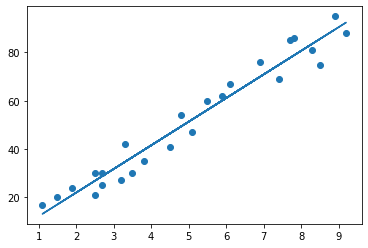

In [10]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [11]:
predictions

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
lr.predict([[9.25]])

array([92.91505723])

# Evaluating the model by using mean square error

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.419727808027651
